In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import tensorflow as tf
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow import keras
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras import metrics


In [67]:
dataframe_train = pd.read_csv("Dataset2/train.csv",)
dataframe_test=pd.read_csv("Dataset2/test.csv",)

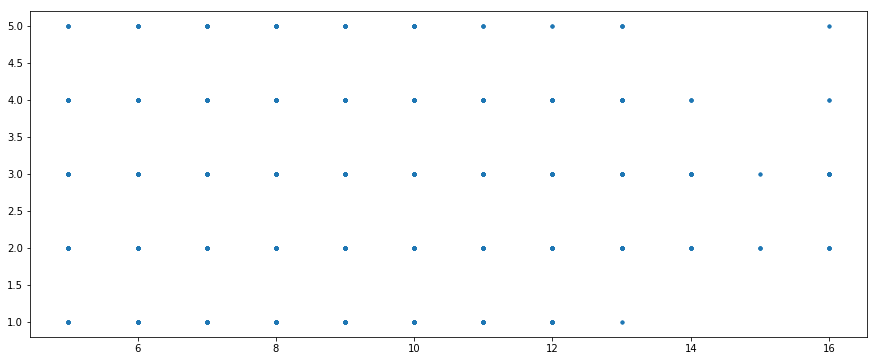

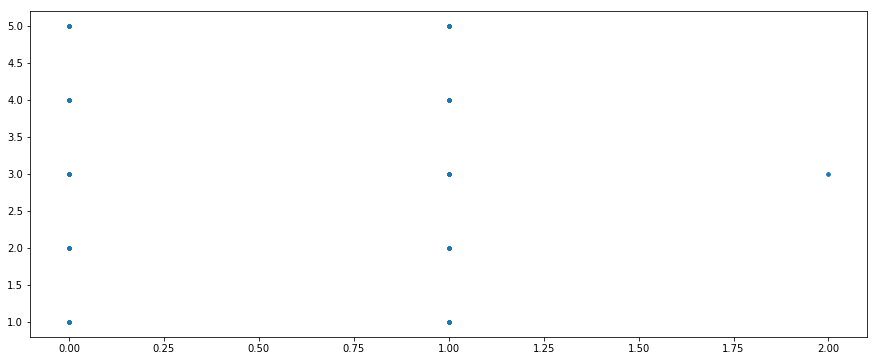

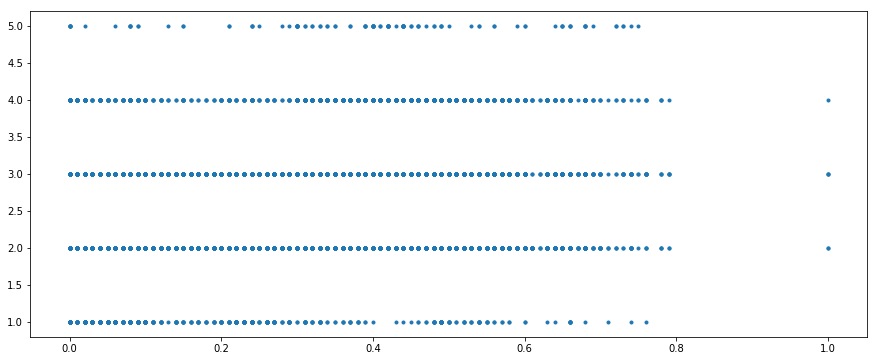

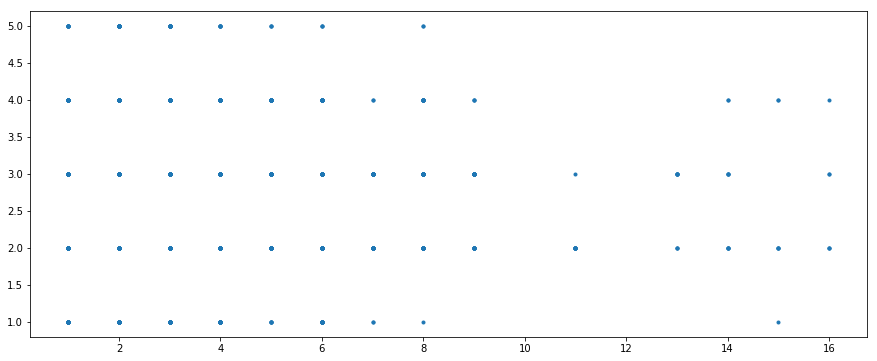

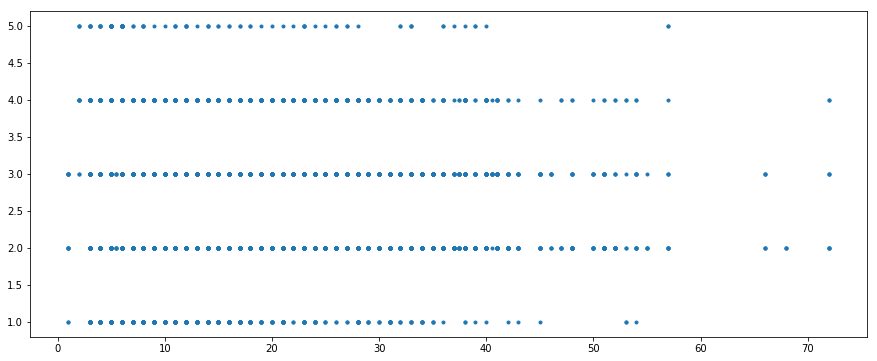

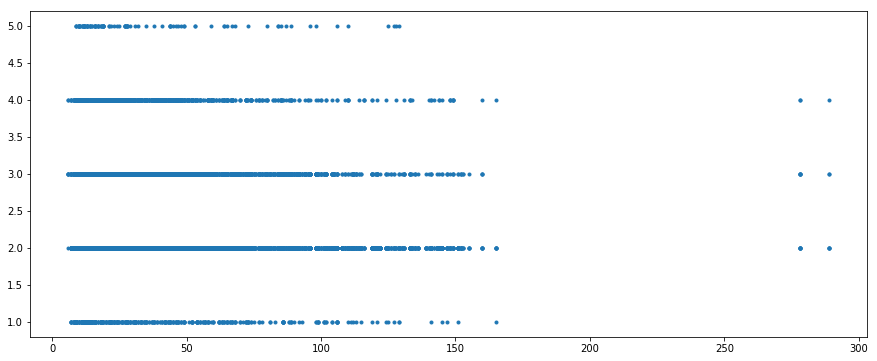

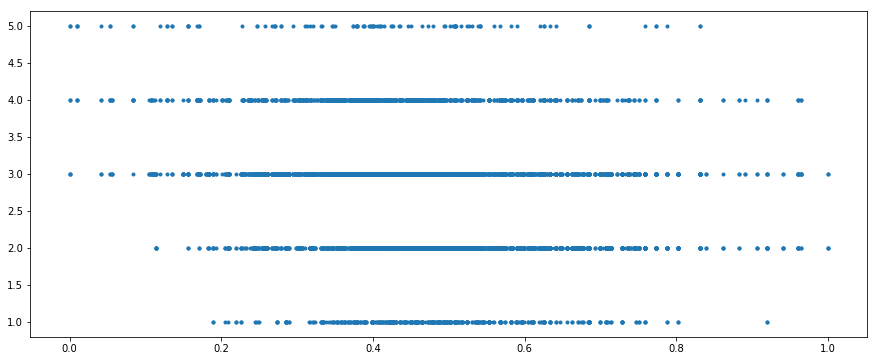

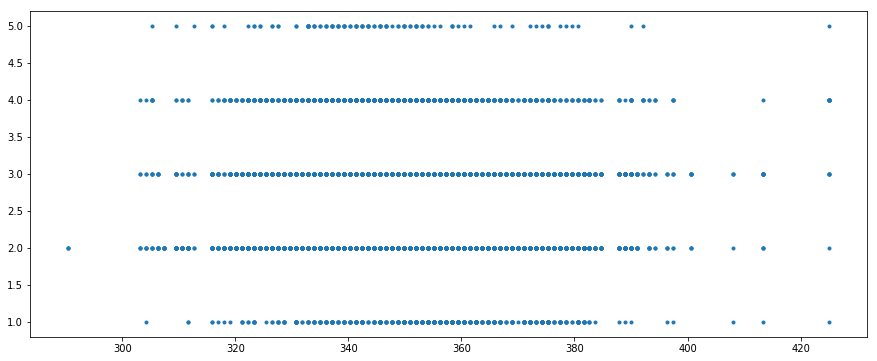

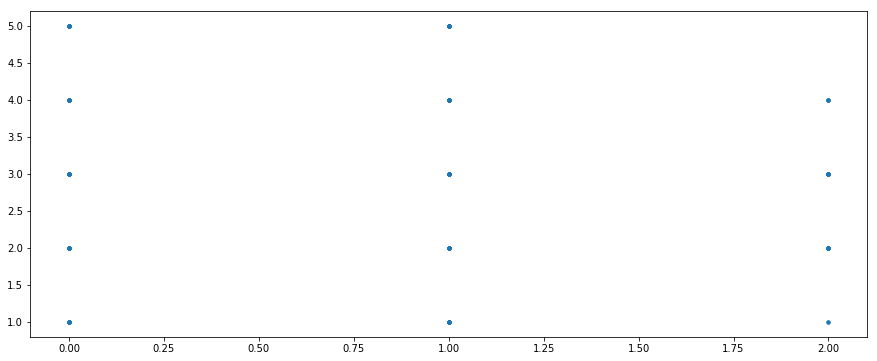

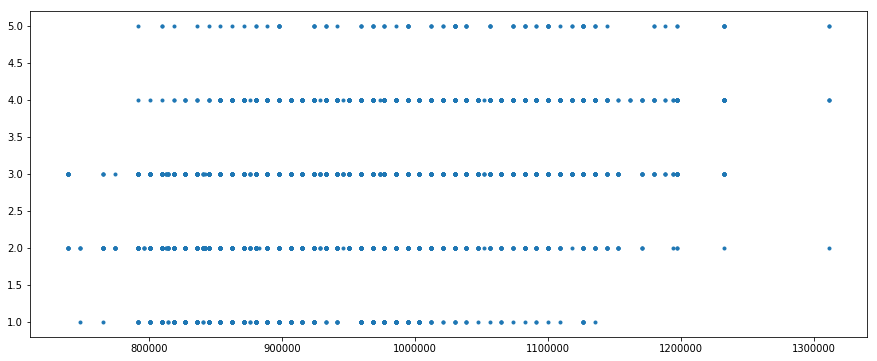

In [3]:
for x in range(10):
    pit.figure(figsize=(15,6))
    pit.scatter(dataframe_train.iloc[:,x],dataframe_train.iloc[:,10],marker=".")
    pit.show()

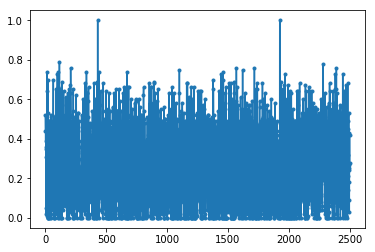

In [4]:
pit.plot(dataframe_test.iloc[:,2],marker=".")

In [68]:
dataframe_train.iloc[:,10]

0       3
1       4
2       3
3       3
4       2
       ..
9995    4
9996    3
9997    3
9998    2
9999    2
Name: DEFCON_Level, Length: 10000, dtype: int64

In [69]:
dataframe_train["DEFCON_Level"].value_counts()

2    4270
3    3910
4    1212
1     498
5     110
Name: DEFCON_Level, dtype: int64

In [5]:
slt_df1 = dataframe_train[dataframe_train['DEFCON_Level'] == 1 ]
slt_df2 = dataframe_train[dataframe_train['DEFCON_Level'] == 2 ]
slt_df3 = dataframe_train[dataframe_train['DEFCON_Level'] == 3 ]
slt_df4 = dataframe_train[dataframe_train['DEFCON_Level'] == 4 ]
slt_df5 = dataframe_train[dataframe_train['DEFCON_Level'] == 5 ]
#slt_df1 = dataframe_train[dataframe_train['DEFCON_Level'] == 1 ].index

In [6]:
slt_df5

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
58,8,0,0.42,2,9.0,17.0,0.379589,345.56,1,1100000.0,5,1564
349,9,0,0.39,2,12.0,31.0,0.310573,332.84,1,994400.0,5,12005
477,10,0,0.45,6,5.0,13.0,0.508811,336.02,1,1056000.0,5,10964
536,6,0,0.25,2,33.0,84.0,0.053598,351.92,1,1188000.0,5,5032
595,8,0,0.49,2,33.0,125.0,0.332599,348.74,1,1091200.0,5,10119
...,...,...,...,...,...,...,...,...,...,...,...,...
9561,10,0,0.43,3,4.0,10.0,0.508811,342.38,1,968000.0,5,507
9614,8,0,0.40,2,6.0,16.0,0.379589,346.62,1,1038400.0,5,2557
9662,10,0,0.50,2,13.0,19.0,0.445668,343.44,1,976800.0,5,82
9826,8,0,0.34,3,6.0,11.0,0.538179,350.86,1,924000.0,5,2533


In [7]:
slt_df5["Allied_Nations"].unique().sort()
slt_df5["Allied_Nations"].unique()

array([ 8,  9, 10,  6, 11,  7,  5, 12, 13, 16])

In [8]:
slt_df4["Allied_Nations"].unique().sort()
slt_df4["Allied_Nations"].unique()

array([ 8,  7, 10,  6,  5, 16,  9, 11, 13, 12, 14])

In [9]:
slt_df3["Allied_Nations"].unique().sort()
slt_df3["Allied_Nations"].unique()

array([16,  9,  7,  6, 13,  8,  5, 10, 12, 11, 14, 15])

In [10]:
slt_df2["Allied_Nations"].unique().sort()
slt_df2["Allied_Nations"].unique()

array([ 8,  6, 10,  7, 11,  9, 12, 13,  5, 14, 16, 15])

In [11]:
slt_df1["Allied_Nations"].unique().sort()
slt_df1["Allied_Nations"].unique()

array([ 8,  7,  6, 11,  9, 12, 10, 13,  5])

In [12]:
slt_df1["Diplomatic_Meetings_Set"].unique()

array([1, 0])

In [13]:
slt_df2["Diplomatic_Meetings_Set"].unique()

array([1, 0])

In [14]:
slt_df3["Diplomatic_Meetings_Set"].unique()

array([1, 0, 2])

In [15]:
slt_df4["Diplomatic_Meetings_Set"].unique()

array([1, 0])

In [16]:
slt_df5["Diplomatic_Meetings_Set"].unique()

array([0, 1])

In [17]:
slt_df1["Hostile_Nations"].unique()

array([ 1,  2,  3,  4,  6,  7,  5, 15,  8])

In [18]:
slt_df2["Hostile_Nations"].unique()

array([ 5,  2,  7,  3,  1, 11,  8,  4, 16,  6,  9, 13, 14, 15])

In [19]:
slt_df3["Hostile_Nations"].unique()

array([ 3,  2,  6,  1,  4,  8,  9,  5, 13,  7, 14, 11, 16])

In [20]:
slt_df4["Hostile_Nations"].unique()

array([ 2,  6,  4,  1,  3,  5,  8, 14,  7, 15, 16,  9])

In [21]:
slt_df5["Hostile_Nations"].unique()

array([2, 6, 4, 3, 1, 5, 8])

In [22]:
slt_df1["Active_Threats"].unique()

array([ 6.,  4., 39.,  5., 13.,  3., 18., 31., 12., 19., 35., 21., 10.,
       11., 30., 24., 20., 34., 16., 28.,  7.,  8.,  9., 15., 29., 14.,
       32.,  1., 25., 17., 53., 26., 36., 38., 23., 22., 43., 54., 27.,
       33., 45., 42., 40.])

In [23]:
slt_df2["Active_Threats"].unique()

array([13. ,  4. , 18. , 35. ,  8. , 15. ,  5. , 11. , 10. , 21. ,  9. ,
       45. , 24. , 17. , 26. , 12. ,  7. , 23. , 31. , 27. , 55. , 28. ,
       16. , 14. ,  3. , 20. , 43. ,  6. , 38. , 42. , 30. , 19. , 33. ,
       51. , 29. , 32. , 22. , 40. , 25. , 34. , 72. , 39. , 47. , 66. ,
       37. , 41. , 52. , 68. , 36. , 54. , 50. , 46. ,  5.5, 57. , 53. ,
       48. ,  1. , 37.5, 40.5])

In [24]:
slt_df3["Active_Threats"].unique()

array([ 6. , 32. , 31. , 27. , 10. ,  5. , 14. , 16. , 17. ,  7. , 52. ,
        9. , 55. , 18. , 29. ,  3. ,  4. , 23. , 15. , 11. , 12. , 26. ,
       13. , 22. , 24. ,  1. , 30. , 25. , 19. , 20. ,  8. , 72. , 51. ,
       42. , 35. , 37. , 21. , 34. , 28. , 41. , 46. , 57. , 36. , 37.5,
       38. , 33. ,  2. , 66. , 45. , 43. ,  5.5, 50. , 40. , 48. , 54. ,
       53. , 39. , 40.5])

In [25]:
slt_df4["Active_Threats"].unique()

array([38. , 42. , 34. ,  6. , 51. , 15. , 14. , 22. ,  7. , 18. , 10. ,
        3. ,  5. , 29. , 48. , 27. , 12. ,  8. ,  4. , 26. , 24. , 19. ,
       16. ,  9. , 17. , 13. , 11. , 32. , 36. , 21. , 47. , 53. , 41. ,
       20. , 30. , 28. , 31. ,  2. , 54. , 25. , 23. , 40. , 37.5, 35. ,
       57. , 33. , 43. , 45. , 52. , 39. , 40.5, 72. , 50. , 37. ])

In [26]:
act=slt_df5["Active_Threats"].unique()

In [27]:
slt_df1["Percent_Of_Forces_Mobilized"].unique()

array([0.  , 0.48, 0.06, 0.04, 0.11, 0.05, 0.31, 0.1 , 0.25, 0.02, 0.12,
       0.38, 0.08, 0.01, 0.18, 0.09, 0.07, 0.21, 0.37, 0.29, 0.32, 0.47,
       0.24, 0.66, 0.23, 0.14, 0.27, 0.03, 0.49, 0.17, 0.35, 0.16, 0.54,
       0.33, 0.22, 0.19, 0.53, 0.68, 0.43, 0.26, 0.58, 0.28, 0.39, 0.46,
       0.4 , 0.52, 0.2 , 0.15, 0.6 , 0.44, 0.57, 0.34, 0.64, 0.55, 0.56,
       0.36, 0.5 , 0.51, 0.3 , 0.76, 0.13, 0.45, 0.63, 0.74, 0.71])

In [28]:
slt_df2["Percent_Of_Forces_Mobilized"].unique()

array([0.12, 0.1 , 0.65, 0.29, 0.3 , 0.22, 0.08, 0.  , 0.58, 0.13, 0.35,
       0.09, 0.24, 0.49, 0.34, 0.32, 0.27, 0.21, 0.23, 0.06, 0.19, 0.02,
       0.03, 0.2 , 0.44, 0.26, 0.25, 0.16, 0.63, 0.04, 0.37, 0.31, 0.55,
       0.43, 0.18, 0.53, 0.42, 0.05, 0.47, 0.33, 0.69, 0.52, 0.07, 0.36,
       0.7 , 0.41, 0.39, 0.66, 0.28, 0.62, 0.11, 0.51, 0.15, 0.4 , 0.01,
       0.5 , 0.48, 0.45, 0.64, 0.57, 0.56, 0.14, 0.17, 0.68, 0.38, 0.6 ,
       0.46, 0.72, 0.73, 0.59, 0.54, 0.78, 0.61, 0.74, 0.76, 0.67, 0.79,
       0.71, 1.  , 0.75])

In [29]:
slt_df3["Percent_Of_Forces_Mobilized"].unique()

array([0.67, 0.49, 0.3 , 0.  , 0.01, 0.03, 0.15, 0.38, 0.12, 0.1 , 0.2 ,
       0.09, 0.25, 0.48, 0.28, 0.14, 0.31, 0.27, 0.13, 0.42, 0.47, 0.26,
       0.4 , 0.06, 0.33, 0.02, 0.37, 0.46, 0.65, 0.32, 0.6 , 0.19, 0.41,
       0.11, 0.34, 0.23, 0.53, 0.39, 0.5 , 0.44, 0.55, 0.45, 0.07, 0.29,
       0.57, 0.36, 0.08, 0.17, 0.16, 0.54, 1.  , 0.66, 0.21, 0.05, 0.04,
       0.24, 0.18, 0.51, 0.43, 0.22, 0.58, 0.75, 0.35, 0.56, 0.73, 0.52,
       0.63, 0.59, 0.74, 0.64, 0.79, 0.62, 0.68, 0.69, 0.7 , 0.76, 0.72,
       0.78, 0.61, 0.71])

In [30]:
slt_df4["Percent_Of_Forces_Mobilized"].unique()

array([0.11, 0.08, 0.1 , 0.73, 0.31, 0.33, 0.47, 0.  , 0.37, 0.36, 0.63,
       0.54, 0.57, 0.58, 0.02, 0.43, 0.41, 0.35, 0.39, 0.52, 0.23, 0.55,
       0.19, 0.49, 0.4 , 0.38, 0.5 , 0.34, 0.51, 0.66, 0.59, 0.3 , 0.04,
       0.42, 0.45, 0.65, 0.2 , 0.32, 0.24, 0.6 , 0.44, 0.07, 0.29, 0.64,
       0.09, 0.56, 0.69, 0.46, 0.01, 0.27, 0.18, 0.62, 0.21, 0.48, 0.03,
       0.53, 0.06, 0.05, 0.26, 0.79, 0.28, 0.68, 0.12, 0.14, 0.67, 0.15,
       0.78, 0.16, 0.61, 0.25, 0.22, 1.  , 0.76, 0.13, 0.17, 0.72, 0.75,
       0.7 , 0.74, 0.71])

In [31]:
per=slt_df5["Percent_Of_Forces_Mobilized"].unique()

In [32]:
slt_df1["Inactive_Threats"].unique()

array([ 13.,   8., 106.,  11.,  14.,  26.,  27.,  89.,  67.,  66.,  73.,
         7.,  68.,  45.,  28.,  31., 151.,  29.,  43.,  49.,  98.,  72.,
       104.,  55.,  40.,  18.,  32.,  17.,  12.,  38.,  54.,  24.,  30.,
        88.,  65.,  33.,  22.,  23.,  15.,  62.,  81.,  21.,   9.,  35.,
        47.,  44.,  52.,  34.,  46.,  63., 129.,  77., 147.,  16.,  42.,
        25., 101.,  92.,  19.,  10.,  78.,  86., 102., 127.,  20.,  56.,
        37.,  39., 165.,  83.,  74.,  48.,  64.,  36., 145.,  58.,  59.,
       110.,  93., 112.,  57.,  41.,  51.,  99., 119., 115.,  60.,  71.,
        90.,  70.,  75., 111., 113., 125., 141., 121., 124.])

In [33]:
slt_df2["Inactive_Threats"].unique()

array([ 42. ,  11. ,  39. ,  58. ,  53. ,  28. ,  63. ,  27. ,   7. ,
        20. ,  10. ,  31. ,  13. ,  23. ,  89. , 102. , 122. ,  91. ,
        90. ,  21. ,  14. ,  22. ,  50. ,  69. , 121. ,  99. , 124. ,
        54. ,  32. ,  25. ,  26. ,  38. ,  67. ,  51. , 145. ,  19. ,
        59. ,  30. ,  44. , 133. ,  16. , 110. , 103. , 144. ,  98. ,
        47. ,  84. ,  43. ,  49. ,  41. ,  65. ,  36. ,  73. ,  66. ,
       119. ,  29. , 116. ,  24. ,  15. ,  46. ,  45. , 153. ,  48. ,
        68. ,  75. , 104. , 136. , 113. ,  18. ,  34. ,  55. ,  35. ,
        85. ,   8. ,  17. ,  79. , 111. , 152. , 141. ,  40. ,  37. ,
       112. , 115. , 148. ,  87. ,  12. ,  86. , 101. , 129. ,  56. ,
        77. , 106. ,  52. ,  61. ,  60. ,  64. , 120. , 278. ,  77.5,
        94. ,  72. , 109. ,  88. ,   9. , 151. , 134. , 114. ,  62. ,
        93. , 100. ,  71. , 139. ,  81. , 130. , 131. , 143. ,  83. ,
       105. ,  92. ,  78. ,  96. , 108. ,  80. , 135. ,  33. , 155. ,
       147. ,  82. ,

In [34]:
slt_df3["Inactive_Threats"].unique()

array([ 25. ,  69. ,  52. ,  60. ,  24. ,  11. ,  31. , 108. ,  20. ,
        71. ,  50. , 121. ,  28. , 101. ,  55. ,  21. ,  46. ,  19. ,
        42. ,  49. ,  79. ,  45. , 109. ,  13. ,  29. ,  15. ,  26. ,
        44. ,   8. ,  63. ,  36. ,  39. ,  86. ,   9. ,  40. ,  34. ,
        38. ,  91. ,  22. ,  53. ,  12. ,  30. ,  61. ,  17. ,  16. ,
        88. ,  96. ,  43. , 112. ,  47. ,  87. ,  77.5,  14. ,  18. ,
        82. ,  23. ,  27. ,  33. , 135. ,  32. ,  92. , 153. , 105. ,
        81. ,  68. ,  94. ,  77. ,  65. ,  48. , 144. ,  54. , 106. ,
        98. ,  85. ,  10. ,  74. ,  35. ,  37. ,  41. ,  99. ,  62. ,
       113. , 130. ,  67. ,  89. ,  64. ,  90. ,  66. , 160. , 131. ,
       100. ,  56. , 141. , 120. ,  84. , 278. , 134. ,  57. ,  80. ,
        58. ,  51. ,  73. , 152. , 149. , 104. , 102. ,  59. ,  95. ,
        72. ,   7. , 119. ,  70. , 111. , 133. , 136. ,  78. ,  83. ,
       126. ,  76. , 147. ,   6. , 289. , 110. , 114. ,  75. ,  93. ,
       124. , 129. ,

In [35]:
slt_df4["Inactive_Threats"].unique()

array([ 48.,  52.,  45.,  17., 140.,  29.,  25.,  37.,  32.,  28.,  49.,
        22.,  10.,  13.,  50., 278.,   9.,  44.,  47.,  65.,  12.,  67.,
        72.,  21.,  24.,  60.,  27.,  19.,  16.,  59.,  18.,  31.,  30.,
        35.,  15.,  11., 142.,  62.,  23.,  46.,  89., 141.,  74.,  20.,
        55.,  86., 149.,  26.,  40.,  70.,  36.,  38.,  88.,  41.,  43.,
        58., 116.,  53., 134.,  64.,  14.,  54.,  33., 110.,  34.,   8.,
        90., 121.,  39., 133., 100.,  77.,  42.,  51.,  76.,  84.,  95.,
        79.,   7., 148., 289.,  56.,  80., 124.,  96.,  85., 165., 104.,
        68.,  73.,  78., 119.,  99.,   6.,  87., 131., 102.,  61.,  66.,
        82.,  63., 106., 144.,  57., 114.,  94., 109.,  83., 145.,  92.,
       128., 160.,  98.])

In [36]:
ina=slt_df5["Inactive_Threats"].unique()

In [37]:
cit=slt_df5["Citizen_Fear_Index"]

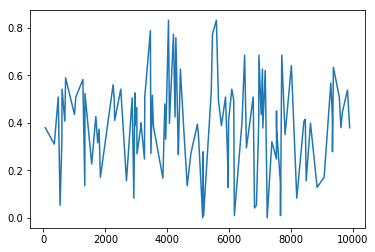

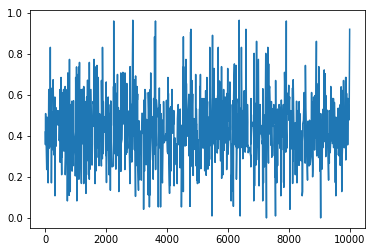

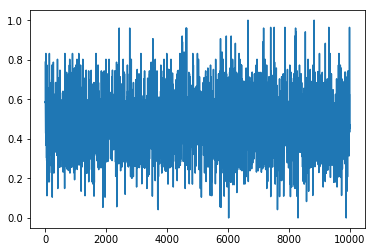

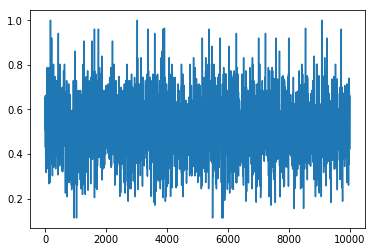

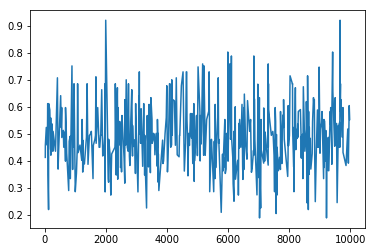

In [38]:
#for x in range(10):
pit.plot(slt_df5.iloc[:,6])
    #print(f" 5 {x}")
pit.show()
pit.plot(slt_df4.iloc[:,6])
    #print(f" 4 {x}")
pit.show()
pit.plot(slt_df3.iloc[:,6])
    #print(f" 3 {x}")
pit.show()
pit.plot(slt_df2.iloc[:,6])
    #print(f" 2 {x}")
pit.show()
pit.plot(slt_df1.iloc[:,6])
    #print(f" 1 {x}")
    
pit.show()
 

In [39]:
#dataframe_train.drop(slt_df,inplace=True)


In [70]:
dataframe_train["Allied_Nations"]=dataframe_train["Allied_Nations"].astype(np.float16)
dataframe_train["Diplomatic_Meetings_Set"]=dataframe_train["Diplomatic_Meetings_Set"].astype(np.float16)
dataframe_train["Hostile_Nations"]=dataframe_train["Hostile_Nations"].astype(np.float16)
dataframe_train["Aircraft_Carriers_Responding"]=dataframe_train["Aircraft_Carriers_Responding"].astype(np.float16)

In [71]:
# del dataframe_train["Adverse_Weather_Metric"]
# del dataframe_train["Max_Elevation"]
dataframe_train

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,324.36,1.0,862400.0,3,7570
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,359.34,0.0,959200.0,4,12128
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,332.84,1.0,836000.0,3,2181
3,7.0,0.0,0.30,2.0,31.0,52.0,0.589574,358.28,1.0,924000.0,3,5946
4,8.0,1.0,0.12,5.0,13.0,42.0,0.552863,364.64,0.0,968000.0,2,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.0,1.0,0.49,5.0,5.0,13.0,0.919971,329.66,1.0,1029600.0,4,11493
9996,10.0,0.0,0.52,2.0,14.0,28.0,0.433921,348.74,1.0,1047200.0,3,305
9997,7.0,1.0,0.13,2.0,25.0,42.0,0.470631,366.76,1.0,941600.0,3,612
9998,10.0,1.0,0.42,2.0,21.0,84.0,0.662996,348.74,1.0,836000.0,2,4963


In [72]:
train_data=dataframe_train.iloc[:,:10]

In [73]:
train_data

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,324.36,1.0,862400.0
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,359.34,0.0,959200.0
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,332.84,1.0,836000.0
3,7.0,0.0,0.30,2.0,31.0,52.0,0.589574,358.28,1.0,924000.0
4,8.0,1.0,0.12,5.0,13.0,42.0,0.552863,364.64,0.0,968000.0
...,...,...,...,...,...,...,...,...,...,...
9995,11.0,1.0,0.49,5.0,5.0,13.0,0.919971,329.66,1.0,1029600.0
9996,10.0,0.0,0.52,2.0,14.0,28.0,0.433921,348.74,1.0,1047200.0
9997,7.0,1.0,0.13,2.0,25.0,42.0,0.470631,366.76,1.0,941600.0
9998,10.0,1.0,0.42,2.0,21.0,84.0,0.662996,348.74,1.0,836000.0


In [74]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std


In [75]:
train_data

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,4.390625,0.951172,2.033521,0.379639,-0.938915,-0.633135,2.238342,-1.628772,0.330811,-0.594142
1,-0.183105,0.951172,-0.817314,-0.382812,2.141294,0.043084,-0.500941,0.519119,-2.707031,0.449888
2,0.388672,0.951172,1.117181,0.379639,1.563755,0.660501,0.710455,-1.108071,0.330811,-0.878877
3,-0.754883,-1.046875,0.149934,-0.382812,1.467498,0.160687,0.765022,0.454032,0.330811,0.070241
4,-0.183105,0.951172,-0.766406,1.904297,-0.265119,-0.133321,0.492185,0.844557,-2.707031,0.544800
...,...,...,...,...,...,...,...,...,...,...
9995,1.532227,0.951172,1.117181,1.904297,-1.035172,-0.985945,3.220556,-1.303334,0.330811,1.209183
9996,0.960449,-1.046875,1.269905,-0.382812,-0.168863,-0.544933,-0.391807,-0.131757,0.330811,1.399007
9997,-0.754883,0.951172,-0.715499,-0.382812,0.889959,-0.133321,-0.118969,0.974732,0.330811,0.260065
9998,0.960449,0.951172,0.760827,-0.382812,0.504933,1.101514,1.310697,-0.131757,0.330811,-0.878877


In [76]:
labels=dataframe_train.iloc[:,10]

In [77]:
encoded=LabelEncoder()
encoded.fit(labels)
labels_encoded=encoded.transform(labels)
labels_encoded

array([2, 3, 2, ..., 2, 1, 1])

In [78]:
np.unique(labels_encoded)


array([0, 1, 2, 3, 4])

In [49]:
# smt = SMOTE()
# train_data, labels_encoded = smt.fit_sample(train_data, labels_encoded)

In [50]:
def build_model():
    model=Sequential()
    model.add(Dense(512,activation="relu",input_shape=(train_data.shape[1],)))

    
    model.add(Dense(100,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(5,activation='softmax'))
    
    
    return model


In [51]:
train_data.shape[1]

10

In [52]:
# def build_model():
#     model=Sequential()
#     model.add(Dense(128,activation="relu",input_shape=(10,)))

    
#     model.add(Dense(128,activation='relu'))
#     model.add(Dense(128,activation='relu'))
#     model.add(Dense(128,activation='relu'))
#     model.add(Dense(5,activation='softmax'))
#    # model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
    
#     return model


In [79]:
def build_model():
    model=Sequential()
    model.add(Dense(128,activation="relu",input_shape=(10,)))

    
    model.add(Dense(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(5,activation='softmax'))
   # model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
    
    return model

In [80]:
trainx,testx,trainy,testy=train_test_split(train_data,labels_encoded,test_size=0.25,random_state=50)


In [81]:
4 in trainy

True

In [114]:
labels_encoded.shape

(10000,)

In [115]:

k=10
num_val_samples =len(train_data)//k
all_score=[]
for i in range(k):
    
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = labels_encoded[i * num_val_samples: (i + 1) * num_val_samples]
#     print(val_data,val_targets)
    data_train =np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    train_targets =np.concatenate([labels_encoded[:i * num_val_samples],labels_encoded[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(data_train, train_targets,epochs=32, batch_size=5, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_score.append(val_mae)
    

processing fold # 0
Train on 9000 samples
Epoch 1/32
9000/9000 [==============================] - 3s 363us/sample - loss: 1.0836 - accuracy: 0.5243
Epoch 2/32
9000/9000 [==============================] - 3s 371us/sample - loss: 1.0050 - accuracy: 0.5572
Epoch 3/32
9000/9000 [==============================] - 3s 361us/sample - loss: 0.9906 - accuracy: 0.5681
Epoch 4/32
9000/9000 [==============================] - 3s 369us/sample - loss: 0.9797 - accuracy: 0.5703
Epoch 5/32
9000/9000 [==============================] - 3s 324us/sample - loss: 0.9709 - accuracy: 0.5724
Epoch 6/32
9000/9000 [==============================] - 3s 320us/sample - loss: 0.9633 - accuracy: 0.5791
Epoch 7/32
9000/9000 [==============================] - 3s 317us/sample - loss: 0.9569 - accuracy: 0.5817
Epoch 8/32
9000/9000 [==============================] - 3s 320us/sample - loss: 0.9524 - accuracy: 0.5860
Epoch 9/32
9000/9000 [==============================] - 3s 319us/sample - loss: 0.9469 - accuracy: 0.5820
Epoc

9000/9000 [==============================] - 3s 308us/sample - loss: 0.8980 - accuracy: 0.5998
Epoch 21/32
9000/9000 [==============================] - 3s 314us/sample - loss: 0.8960 - accuracy: 0.6040
Epoch 22/32
9000/9000 [==============================] - 3s 322us/sample - loss: 0.8922 - accuracy: 0.6072
Epoch 23/32
9000/9000 [==============================] - 3s 338us/sample - loss: 0.8882 - accuracy: 0.6114
Epoch 24/32
9000/9000 [==============================] - 3s 318us/sample - loss: 0.8850 - accuracy: 0.6063
Epoch 25/32
9000/9000 [==============================] - 3s 319us/sample - loss: 0.8815 - accuracy: 0.6094
Epoch 26/32
9000/9000 [==============================] - 3s 313us/sample - loss: 0.8780 - accuracy: 0.6118
Epoch 27/32
9000/9000 [==============================] - 3s 309us/sample - loss: 0.8751 - accuracy: 0.6144
Epoch 28/32
9000/9000 [==============================] - 3s 318us/sample - loss: 0.8736 - accuracy: 0.6123
Epoch 29/32
9000/9000 [==========================

9000/9000 [==============================] - 3s 327us/sample - loss: 0.9594 - accuracy: 0.5792
Epoch 7/32
9000/9000 [==============================] - 3s 324us/sample - loss: 0.9536 - accuracy: 0.5743
Epoch 8/32
9000/9000 [==============================] - 3s 323us/sample - loss: 0.9483 - accuracy: 0.5761
Epoch 9/32
9000/9000 [==============================] - 3s 325us/sample - loss: 0.9441 - accuracy: 0.5823
Epoch 10/32
9000/9000 [==============================] - 3s 325us/sample - loss: 0.9382 - accuracy: 0.5836
Epoch 11/32
9000/9000 [==============================] - 3s 328us/sample - loss: 0.9342 - accuracy: 0.5847
Epoch 12/32
9000/9000 [==============================] - 3s 320us/sample - loss: 0.9301 - accuracy: 0.5902
Epoch 13/32
9000/9000 [==============================] - 3s 326us/sample - loss: 0.9247 - accuracy: 0.5861
Epoch 14/32
9000/9000 [==============================] - 3s 323us/sample - loss: 0.9218 - accuracy: 0.5892
Epoch 15/32
9000/9000 [=============================

In [61]:

model=build_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

model.fit(trainx,trainy,epochs=32,batch_size=32,validation_data=(testx, testy),verbose=1)

Train on 7500 samples, validate on 2500 samples
Epoch 1/32
7500/7500 [==============================] - 1s 162us/sample - loss: 1.2242 - accuracy: 0.5021 - val_loss: 1.0310 - val_accuracy: 0.5464
Epoch 2/32
7500/7500 [==============================] - 1s 92us/sample - loss: 1.0429 - accuracy: 0.5479 - val_loss: 0.9973 - val_accuracy: 0.5700
Epoch 3/32
7500/7500 [==============================] - 1s 94us/sample - loss: 1.0186 - accuracy: 0.5555 - val_loss: 0.9836 - val_accuracy: 0.5700
Epoch 4/32
7500/7500 [==============================] - 1s 97us/sample - loss: 1.0049 - accuracy: 0.5585 - val_loss: 0.9795 - val_accuracy: 0.5688
Epoch 5/32
7500/7500 [==============================] - 1s 97us/sample - loss: 0.9954 - accuracy: 0.5571 - val_loss: 0.9723 - val_accuracy: 0.5728
Epoch 6/32
7500/7500 [==============================] - 1s 98us/sample - loss: 0.9871 - accuracy: 0.5648 - val_loss: 0.9649 - val_accuracy: 0.5672
Epoch 7/32
7500/7500 [==============================] - 1s 97us/sampl

In [62]:
# model.save("model.Deficon1")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.Deficon1/assets


In [171]:
from tensorflow.keras import models

In [172]:
model=models.load_model("model.Deficon1")

In [173]:


dataframe_test["Allied_Nations"]=dataframe_test["Allied_Nations"].astype(np.float16)
dataframe_test["Diplomatic_Meetings_Set"]=dataframe_test["Diplomatic_Meetings_Set"].astype(np.float16)
dataframe_test["Hostile_Nations"]=dataframe_test["Hostile_Nations"].astype(np.float16)
dataframe_test["Aircraft_Carriers_Responding"]=dataframe_test["Aircraft_Carriers_Responding"].astype(np.float16)

In [174]:
test_data=dataframe_test.iloc[:,:-1]

In [175]:
test_data

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,8.0,0.0,0.52,2.0,19.0,52.0,0.376652,319.06,1.0,976800.0
1,9.0,0.0,0.44,2.0,6.0,12.0,0.254772,351.92,1.0,1082400.0
2,8.0,0.0,0.44,3.0,7.0,18.0,0.472100,349.80,1.0,924000.0
3,10.0,0.0,0.39,2.0,3.0,13.0,0.478708,343.44,1.0,1003200.0
4,9.0,0.0,0.44,2.0,6.0,14.0,0.561674,346.62,1.0,924000.0
...,...,...,...,...,...,...,...,...,...,...
2495,8.0,1.0,0.27,3.0,5.0,77.0,0.552863,338.14,1.0,827200.0
2496,7.0,1.0,0.03,3.0,7.0,15.0,0.588106,363.58,1.0,827200.0
2497,10.0,1.0,0.25,3.0,33.0,151.0,0.626285,334.96,1.0,809600.0
2498,10.0,0.0,0.42,2.0,5.0,12.0,0.507342,336.02,0.0,950400.0


In [176]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [177]:
label_predict=model.predict_classes(test_data)

In [178]:
result_encoded=encoded.inverse_transform(label_predict)

In [179]:
result_encoded

array([4, 4, 3, ..., 2, 3, 2])

In [180]:
ResultCSV=dataframe_test.copy()

In [181]:
ResultCSV["DEFCON_Level"]=result_encoded

In [182]:
check =ResultCSV.query("(Hostile_Nations!=9.0 and Hostile_Nations!=11.0 and Hostile_Nations!=13.0 and Hostile_Nations!=14.0 and Hostile_Nations!=16.0 and Allied_Nations!=14.0 and Allied_Nations!=15.0 )")

In [183]:
check2=check.query("(Diplomatic_Meetings_Set==1.0 or Diplomatic_Meetings_Set==0.0)")

In [184]:
check3=check2.query("(Aircraft_Carriers_Responding==1.0 or Aircraft_Carriers_Responding==0.0)")

In [185]:
check4=check3.query("Percent_Of_Forces_Mobilized in @per")

In [186]:
check5=check4.query("Inactive_Threats in @ina")

In [187]:
check6=check5.query("Active_Threats in @act")

In [188]:
check7=check6.query("Citizen_Fear_Index in @cit")

In [189]:
check7["DEFCON_Level"]=5

/home/fahad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
ids=check7["ID"]

In [201]:
ids

2          14
14        129
15        130
22        170
25        180
        ...  
2468    12354
2470    12366
2473    12389
2487    12438
2492    12473
Name: ID, Length: 399, dtype: int64

In [211]:
# ResultCSV=ResultCSV.replace(check7.index,check7["DEFCON_Level
for ID in ids:
    ResultCSV.loc[(ResultCSV["ID"]==ID)]=check7

In [212]:
ResultCSV

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID,DEFCON_Level
0,8.0,0.0,0.52,2.0,19.0,52.0,0.376652,319.06,1.0,976800.0,1,4
1,9.0,0.0,0.44,2.0,6.0,12.0,0.254772,351.92,1.0,1082400.0,10,4
2,8.0,0.0,0.44,3.0,7.0,18.0,0.472100,349.80,1.0,924000.0,14,5
3,10.0,0.0,0.39,2.0,3.0,13.0,0.478708,343.44,1.0,1003200.0,17,3
4,9.0,0.0,0.44,2.0,6.0,14.0,0.561674,346.62,1.0,924000.0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,8.0,1.0,0.27,3.0,5.0,77.0,0.552863,338.14,1.0,827200.0,12484,2
2496,7.0,1.0,0.03,3.0,7.0,15.0,0.588106,363.58,1.0,827200.0,12487,2
2497,10.0,1.0,0.25,3.0,33.0,151.0,0.626285,334.96,1.0,809600.0,12488,2
2498,10.0,0.0,0.42,2.0,5.0,12.0,0.507342,336.02,0.0,950400.0,12491,3


In [213]:
ResultCSV.loc[:,"ID":"DEFCON_Level"].to_csv(r"Result.csv",index=False)

In [29]:
def build_models():
    model=Sequential()
    model.add(Dense(128,activation="relu",input_shape=(train_data.shape[1],)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(16,activation='relu'))
    
    model.add(Dense(8,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    
    
    return model


In [28]:

model=build_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

model.fit(trainx,trainy,epochs=50,batch_size=1,validation_data=(testx, testy),verbose=1)

Train on 7500 samples, validate on 2500 samples
Epoch 1/50
7500/7500 [==============================] - 21s 3ms/sample - loss: 1.0620 - accuracy: 0.5435 - val_loss: 1.0185 - val_accuracy: 0.5496
Epoch 2/50
7500/7500 [==============================] - 21s 3ms/sample - loss: 0.9972 - accuracy: 0.5615 - val_loss: 0.9952 - val_accuracy: 0.5596
Epoch 3/50
7500/7500 [==============================] - 22s 3ms/sample - loss: 0.9772 - accuracy: 0.5695 - val_loss: 0.9946 - val_accuracy: 0.5692
Epoch 4/50
7500/7500 [==============================] - 22s 3ms/sample - loss: 0.9649 - accuracy: 0.5711 - val_loss: 0.9816 - val_accuracy: 0.5608
Epoch 5/50
7500/7500 [==============================] - 22s 3ms/sample - loss: 0.9531 - accuracy: 0.5772 - val_loss: 0.9832 - val_accuracy: 0.5644
Epoch 6/50
7500/7500 [==============================] - 22s 3ms/sample - loss: 0.9445 - accuracy: 0.5799 - val_loss: 0.9804 - val_accuracy: 0.5652
Epoch 7/50
7500/7500 [==============================] - 21s 3ms/sample

In [ ]:

model=build_models()
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

model.fit(trainx,trainy,epochs=20,batch_size=1,validation_data=(testx, testy),verbose=1)